In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba




In [2]:
os.getcwd()  # Muestra la ruta actual


'c:\\Users\\esmaru\\Desktop\\Esteban\\repos\\mestrado_thz_physics'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
from matplotlib.colors import hsv_to_rgb
import warnings
from glob import glob

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


c = 0.299792458 # speed of light mm/ps

def FourierT2(f,N):
    return np.conj(sp.fft.fft(f.values,n=N))

def calcular_n(omega, phi_exp, c, d):

    return 1 + (c / (omega * d)) * phi_exp

def calcular_kappa(omega, T_exp, n, c, d):

    term = ((n + 1)**2 / (4 * n)) * T_exp
    return -(c / (omega * d)) * np.log(term)


def extraer_angulos(nombres_archivos):
    """
    Extrae el patrón que está después del último '__' y antes de '.dat'
    Ejemplo: '...__hori-80deg.dat' → 'hori-80deg'
    """
    patrones = []
    patron_regex = re.compile(r'__([^__]+)\.dat$')  # Captura lo entre último __ y .dat
    
    for nombre in nombres_archivos:
        coincidencia = patron_regex.search(nombre)
        if coincidencia:
            patrones.append(coincidencia.group(1))
    
    return patrones


In [4]:
# Configuración desde el archivo txt (simulada aquí como un diccionario)
config = {
    'figure.constrained_layout.use': True,
    'figure.figsize': (5.4, 3.2),
    'figure.titlesize': 'small',
    'figure.labelsize': 'small',
    'font.size': 10,
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.texsystem': 'lualatex',
    'pgf.rcfonts': False,
    'pgf.preamble': r'\usepackage{siunitx,fontspec}\setmainfont{Times New Roman}',
    'lines.linewidth': 1,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 4,
    'legend.frameon': False,
    'legend.markerscale': 0.8,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.2,
    'xtick.top': True,
    'xtick.major.size': 5,
    'xtick.major.width': 0.8,
    'xtick.minor.width': 0.8,
    'xtick.minor.size': 3,
    'xtick.labelsize': 'small',
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.major.size': 5,
    'ytick.major.width': 0.8,
    'ytick.minor.width': 0.8,
    'ytick.minor.size': 3,
    'ytick.labelsize': 'small',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8,
    'axes.axisbelow': False,
    'axes.labelsize': 'medium',
    'axes.labelpad': 2,
    'figure.constrained_layout.h_pad': 0.02,
    'figure.constrained_layout.w_pad': 0.01,
    'figure.constrained_layout.hspace': 0.02,
    'figure.constrained_layout.wspace': 0.02,
    'svg.fonttype': 'none'
}

# Aplicar la configuración
plt.rcParams.update(config)

In [5]:
ruta_actual = os.getcwd()

sample1_ang_csv = os.path.join(ruta_actual,"Materials/sample1_ang.csv")
sample2_ang_csv= os.path.join(ruta_actual,"Materials/sample2_ang.csv")

carpeta_sample1 = os.path.join(ruta_actual,"Materials/src/sample1_ang")
carpeta_ref_sample1 = os.path.join(ruta_actual,"Materials/src/reference1")
sample1_med = glob(os.path.join(carpeta_sample1, "*"))
angulos_sample1  = extraer_angulos(sample1_med)
rutas_ref_sample1 = glob(os.path.join(carpeta_ref_sample1, "*"))



# Sample1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display

# Energía
E = np.linspace(0, 3, 500)

# Distribución de Fermi-Dirac
def fermi_dirac(E, mu, T):
    k = 1  # Constante de Boltzmann
    return 1 / (np.exp((E*3 - mu) / (k * T)) + 1)

# Función de graficado
def plot_fermi(mu, T,disc):
    if T <= 0:
        T = 1e-6  # Evita división por cero o valores negativos

    f = fermi_dirac(E, mu, T)*4+E**2
    
    s = plt.figure(figsize=(16, 5))

    plt.subplot(121)
    plt.plot(E, f,'ko', label=fr'Expect unwraped phase')
    # plt.title('Distribución de Fermi-Dirac')
    # plt.xlabel('Energía $E$')
    # plt.ylabel('Ocupación $f(E)$')
    # plt.ylim(-0.05, 1.05)
    # plt.grid(True)
    plt.legend()

    comp = np.exp(f*1j)
    phase = np.angle(comp)
    phase_unwrapped = np.unwrap(phase,discont=disc)
    plt.subplot(122)
    plt.plot(E, phase, label=fr'Phase Wraped', color='black')
    plt.plot(E, phase_unwrapped, label=fr'Phase unwraped', color='blue')
    correcciones = phase_unwrapped  - phase
    saltos = np.where(np.abs(np.diff(correcciones)) > 1e-3)[0]  # umbral 

    for i, idx in enumerate(saltos):
        x_pos = E[idx + 1]
        y_env = phase[idx + 1]
        y_unw = phase_unwrapped[idx + 1]
        delta = y_unw - y_env
        

        # Alternar arriba/abajo para evitar solapamiento
        offset_y = 1 + (i % 2) * 1.2  # Alterna entre 1 y 2.2

        plt.annotate(
            f'+{delta:.1f}',
            xy=(x_pos, y_env),
            xytext=(x_pos, y_unw + offset_y),
            arrowprops=dict(arrowstyle='->', color='red'),
            color='red',
            fontsize=10,
            ha='center'
        )
    plt.legend(loc='upper left')
    plt.ylabel(r"$\phi_{exp}$")

    plt.ylabel('$\phi$')
  
    # plt.ylim(-0.05, 1.05)
    # plt.grid(True)
    plt.legend()

# Opciones de sliders
opc = dict(continuous_update=False, readout_format=".3f")

# Sliders
mu_slider = FloatSlider(min=0, max=10, step=0.1, value=0.0, description='μ', **opc)
T_slider = FloatSlider(min=0.00001, max=5.0, step=0.05, value=1.0, description='T', **opc)
disc = FloatSlider(min=0.00001, max=20, step=0.05, value=np.pi/2, description='dis', **opc)

# Interfaz interactiva
interact(plot_fermi, mu=mu_slider, T=T_slider,disc=disc)


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='μ', max=10.0, readout_forma…

<function __main__.plot_fermi(mu, T, disc)>

# FULL DATA

In [ ]:
def anim2(left,right_sample,right_subs,index,desv,d):
    
    right_ref= right_subs
    left = left
    N = 2**15

    f = plt.figure(figsize=(10,16),dpi=200)

    print(index)
    path_signal = sample1_med[int(index)]
    path_ref = rutas_ref_sample1[0]
    j = round(index)
    print(j)

    num_files = len(sample1_med)
    angles = np.linspace(0, 360, num_files, endpoint=False)  # ángulos de 0 a 350

    # Usar un mapa de colores cíclico
    colors = [hsv_to_rgb([angle / 360.0, 0.6, 0.85]) for angle in angles]

    params_window1 = ['gaussian', desv]#['nuttall'] #['kaiser',desv] #['flattop']# ['gaussian', desv]


    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window1)

    y_subs_ventana = pd.Series(y_substrate_padding*ventana)

    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)



    plt.subplot(421)

    
    plt.plot(y_subs_ventana/max(y_subs_ventana),'k')
    plt.plot(ventana/max(ventana),'k--')
    plt.title("Reference")


    right_sample = right_sample


    # params_window1 = ['flattop'] #['gaussian', desv]
    


    plt.subplot(422)
    # x,y = getFilterdata(path_signal,right_sample,left)
    # df1 = pd.read_csv(path_signal, delim_whitespace=True)
    # color = colormap(j / num_files)  # normalizar j al rango [0,1]
    plt.plot(y_signal_ventaneada/max(y_signal_ventaneada), color=colors[j], label=f"{angles[j]:.0f}°")
    plt.plot(ventana/max(ventana),'k--')
    
    plt.title("Signal")

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.1, 1.2
    mask = (nu >= xmin) & (nu <= xmax)

    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    nu_filtradas = nu[mask]

    T = fft_y_signal_ventaneada/fft_y_subs_ventaneada*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    d = d
    

    T_exp = abs(T)

    phi_exp = np.angle(T)

    phi_exp = np.unwrap(phi_exp)


    plt.subplot(423)

    
    plt.plot(nu_filtradas,np.angle(fft_y_subs_ventaneada),'k',label='reference')
    plt.plot(nu_filtradas,np.unwrap(np.angle(fft_y_subs_ventaneada)),'r',label='reference')

    plt.ylabel(r"$\mathcal{F}(y)$")
    # plt.yscale('log')

    plt.subplot(424)
    plt.plot(nu_filtradas,np.unwrap(np.angle(fft_y_subs_ventaneada)), color=colors[j],label='phase substrate')
    plt.plot(nu_filtradas,np.unwrap(np.angle(fft_y_signal_ventaneada)),'k',label='phase signal')
    plt.plot(nu_filtradas,np.unwrap(np.angle(np.exp(1j*2*np.pi*nu_filtradas*phase*1/30))),'g',label='Aditional phase')
    plt.legend()

    # plt.plot(nu_filtradas,abs(T)/max(abs(T)))
    # plt.yscale('log')


    plt.subplot(425)
    plt.plot(nu_filtradas,abs(T)/max(abs(T)), color=colors[j],label=angulos_sample1[j])
    plt.ylabel(r"$T_{exp}$")
    plt.yscale('log')
    

    plt.subplot(426)
    correcciones = phi_exp - np.angle(T)
    saltos = np.where(np.abs(np.diff(correcciones)) > 1e-3)[0]  # umbral 
    plt.plot(nu_filtradas, phi_exp, label='Phase unwraped',color=colors[j])

    plt.plot(nu_filtradas, np.angle(T), 'ko',label='Phase wraped')
    for i, idx in enumerate(saltos):
        x_pos = nu_filtradas[idx + 1]
        y_env = np.angle(T)[idx + 1]
        y_unw = phi_exp[idx + 1]
        delta = y_unw - y_env

        # Alternar arriba/abajo para evitar solapamiento
        offset_y = 1 + (i % 2) * 1.2  # Alterna entre 1 y 2.2

        plt.annotate(
            f'+{delta:.1f}',
            xy=(x_pos, y_env),
            xytext=(x_pos, y_unw + offset_y),
            arrowprops=dict(arrowstyle='->', color='red'),
            color='red',
            fontsize=6,
            ha='center'
        )
    plt.legend(loc='upper left')
    plt.ylabel(r"$\phi_{exp}$")

    plt.subplot(427)
    n = calcular_n(nu_filtradas*2*np.pi, phi_exp, c, d)
    plt.plot(nu_filtradas,n, color=colors[j],label=angulos_sample1[j])
    plt.xlabel(r"$\nu$ (THz)")

    plt.ylabel(r"$n$")
    
    plt.subplot(428)
    plt.ylabel(r"$\kappa$")
    plt.title(angulos_sample1[j])
    plt.plot(nu_filtradas,calcular_kappa(nu_filtradas*2*np.pi, T_exp, n, c, d), color=colors[j],label=angulos_sample1[j])
    plt.xlabel(r"$\nu$ (THz)")



    plt.legend(bbox_to_anchor=(1.05, 3.0), loc='upper left', title="Ángulo de polarización")
    plt.tight_layout()

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        left= widgets.FloatSlider(min=40,max=70,value=57,step=0.1,**opc),
        right_sample= widgets.FloatSlider(min=50,max=70,value=60.5,step=0.1,**opc),
        right_subs= widgets.FloatSlider(min=50,max=70,value=60,step=0.1,**opc),
        index= widgets.FloatSlider(min=0,max=len(angulos_sample1)-1,value=7,step=1,**opc),
        desv = widgets.FloatSlider(min=0,max=1000,value=150,step=0.001,**opc),
        d = widgets.FloatSlider(min=0,max=1,value=0.5,step=0.01,**opc)

        )

interactive(children=(FloatSlider(value=57.0, continuous_update=False, description='left', max=70.0, min=40.0,…

<function __main__.anim2(left, right_sample, right_subs, index, desv, d)>

In [13]:
angulos_sample1[3]

'30deg'

50
52
52
46
40
41
58
60
59
112
113
115


C:\Users\esmaru\AppData\Local\Temp\ipykernel_8312\2559261511.py:109: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


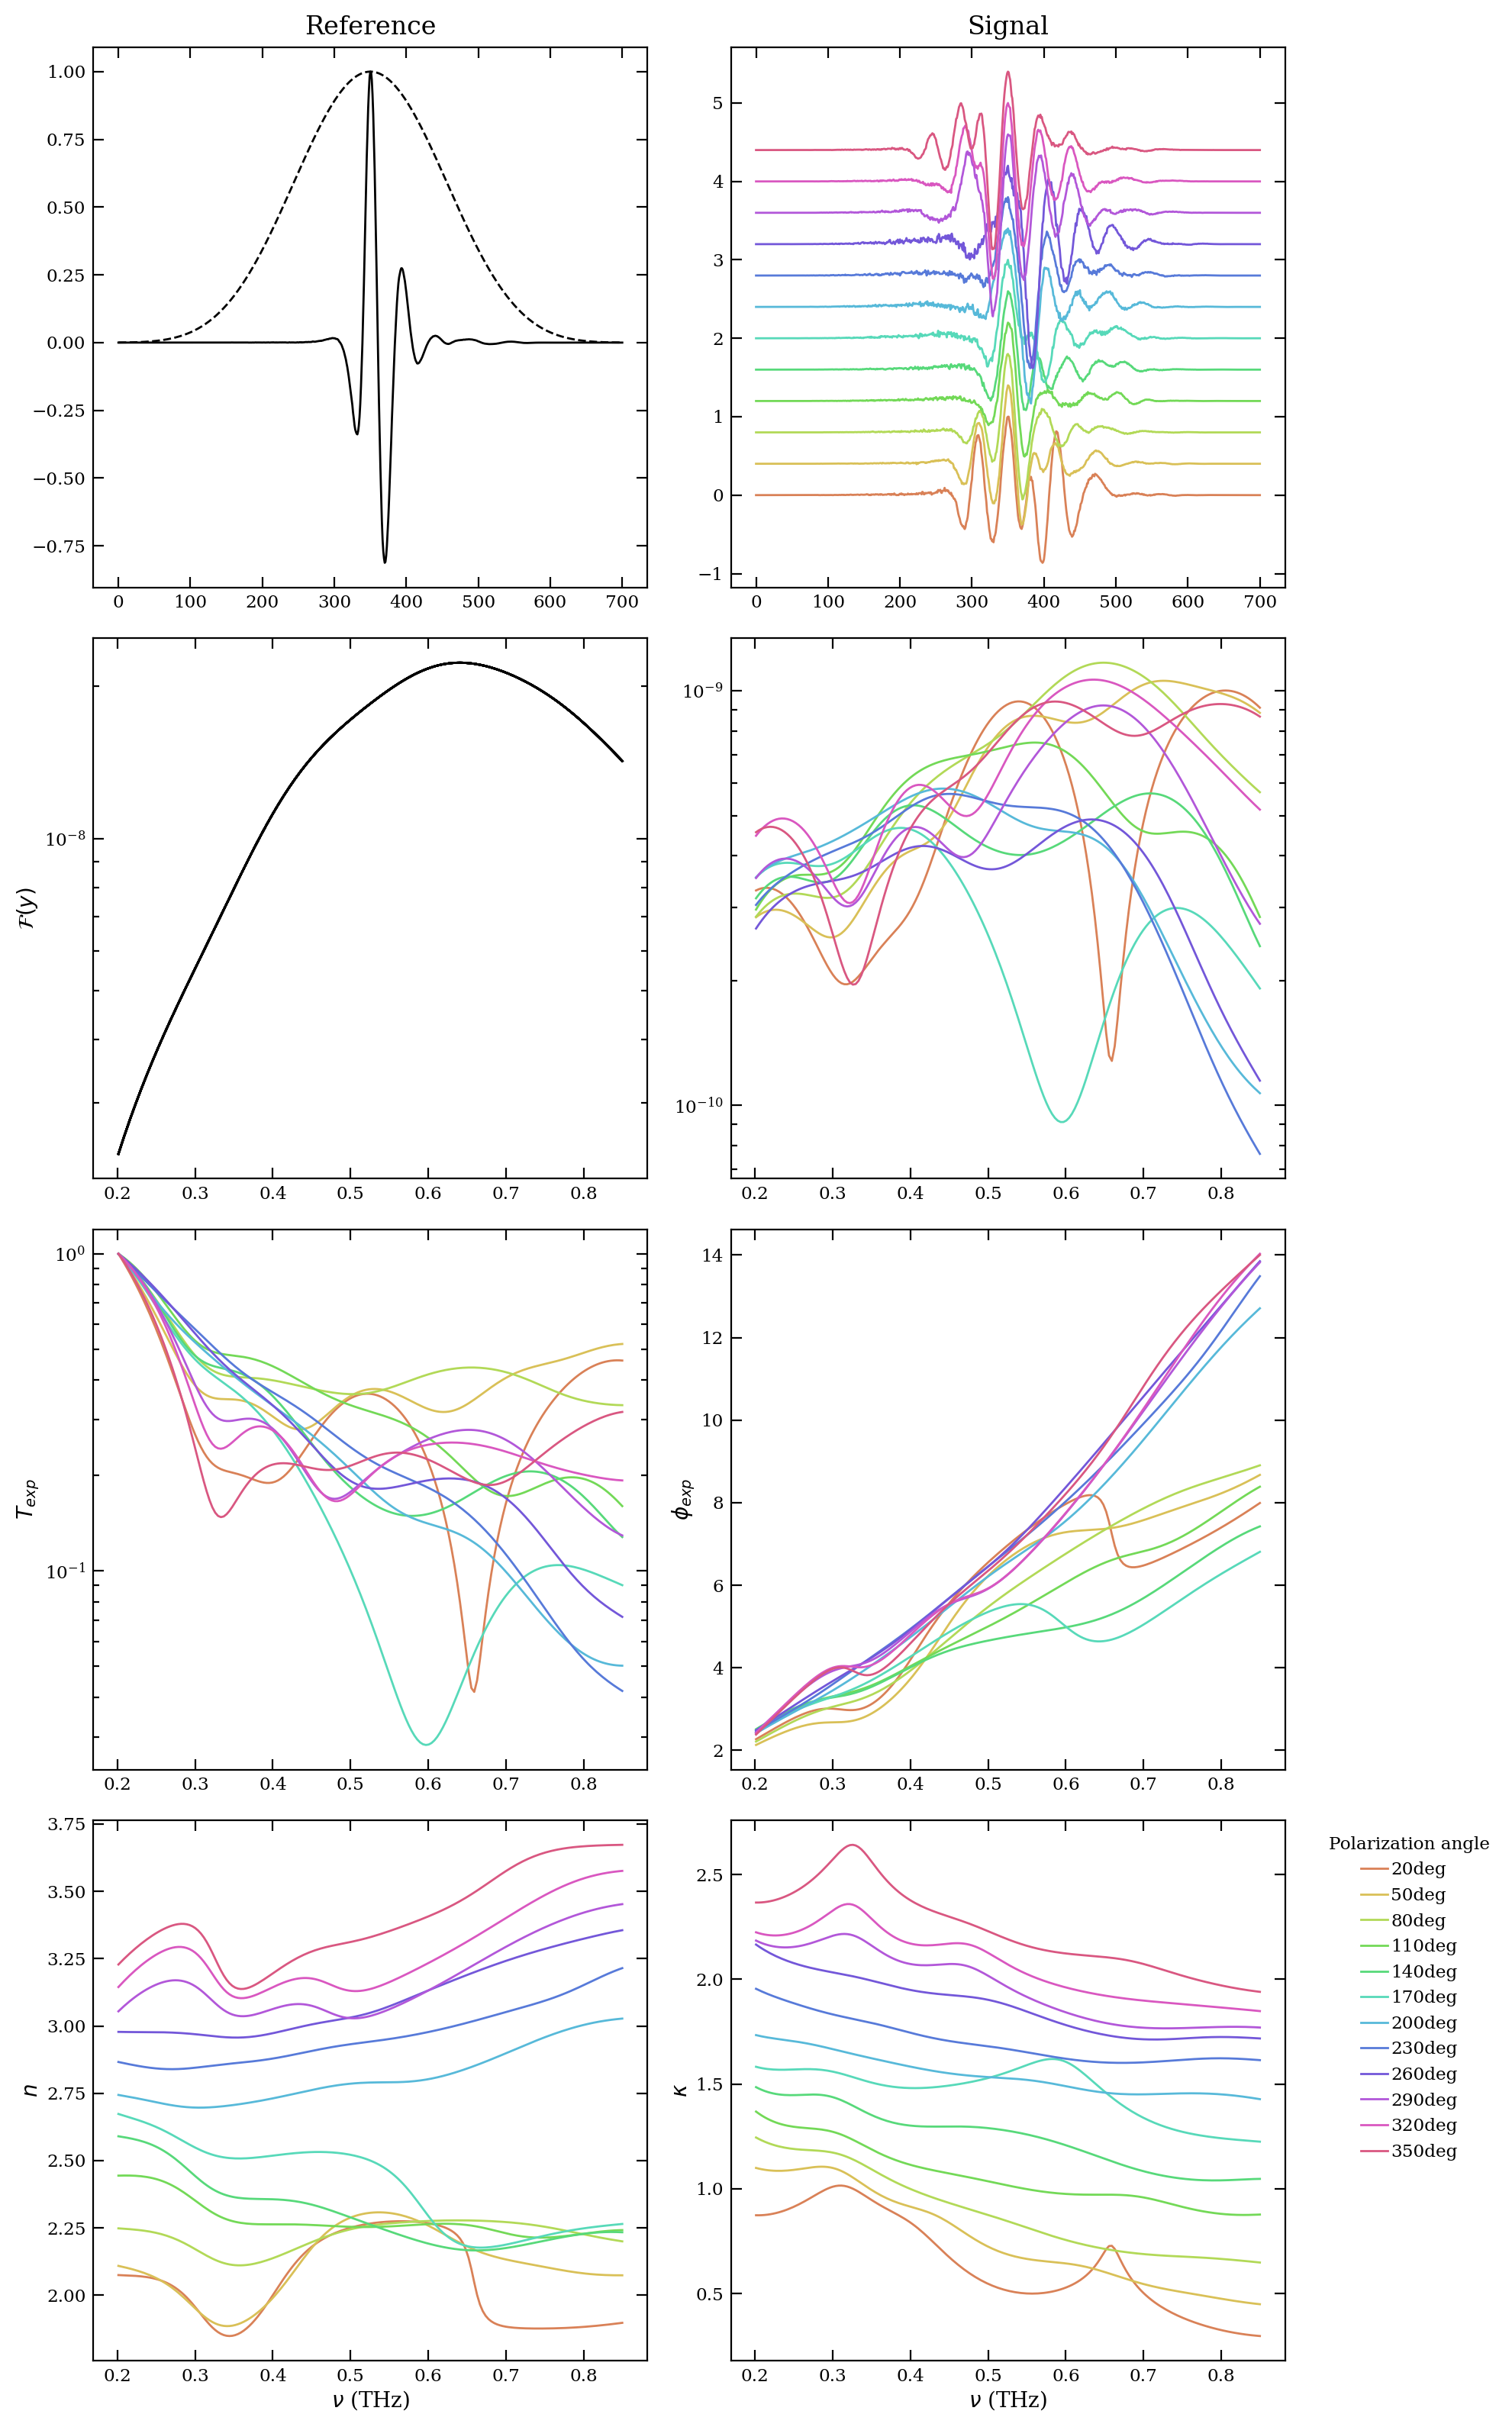

In [32]:

right_ref= 60
left = 57
N = 2**13
d = 1.78
f = plt.figure(figsize=(10,16),dpi=200)


num_files = len(sample1_med)
nn = int(3)
angles = list(np.linspace(0, 360, num_files, endpoint=False))[2::nn]  # ángulos de 0 a 350


# Usar un mapa de colores cíclico
colors = [hsv_to_rgb([angle / 360.0, 0.6, 0.85]) for angle in angles]

desv = 150
# params_window1 = ['gaussian', desv]
path_ref = rutas_ref_sample1[0]
right_sample = 60.5
left = 57
right_subs= 60


for j,path_signal in enumerate(sample1_med[2::nn]):

    params_window1 = ['nuttall'] #['gaussian', desv]
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,
                                                                                 right_sample,right_subs,params_window1)
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)


    plt.subplot(421)

    if j == 0:
        plt.plot(y_subs_ventana/max(y_subs_ventana),'k')
        plt.plot(ventana/max(ventana),'k--')
        plt.title("Reference")

    plt.subplot(422)
    plt.plot(y_signal_ventaneada/max(y_signal_ventaneada)+0.4*j, color=colors[j], label=f"{angles[j]:.0f}°")
    # plt.plot(ventana/max(ventana),'k--')
    plt.title("Signal")

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 0.85
    mask = (nu >= xmin) & (nu <= xmax)

    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    nu_filtradas = nu[mask]

    T = fft_y_signal_ventaneada/fft_y_subs_ventaneada*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)

    

    T_exp = abs(T)
    phi_exp = np.angle(T)
    phi_exp = np.unwrap(phi_exp)
    d = 0.5

    plt.subplot(423)

    
    plt.plot(nu_filtradas,abs(fft_y_subs_ventaneada),'k',label='reference')

    plt.ylabel(r"$\mathcal{F}(y)$")
    plt.yscale('log')

    plt.subplot(424)
    plt.plot(nu_filtradas,abs(fft_y_signal_ventaneada), color=colors[j],label=angulos_sample1[2::nn][j])

    # plt.plot(nu_filtradas,abs(T)/max(abs(T)))
    plt.yscale('log')


    plt.subplot(425)
    plt.plot(nu_filtradas,abs(T)/max(abs(T)), color=colors[j],label=angulos_sample1[2::nn][j])
    plt.ylabel(r"$T_{exp}$")
    plt.yscale('log')
    

    plt.subplot(426)
    plt.plot(nu_filtradas,phi_exp, color=colors[j])
    plt.ylabel(r"$\phi_{exp}$")

    plt.subplot(427)
    n = calcular_n(nu_filtradas*2*np.pi, phi_exp, c, d)
    plt.plot(nu_filtradas,n+0.1*j, color=colors[j],label=angulos_sample1[::nn][j])
    plt.xlabel(r"$\nu$ (THz)")
    plt.ylabel(r"$n$")
    
    plt.subplot(428)
    plt.ylabel(r"$\kappa$")
    plt.xlabel(r"$\nu$ (THz)")
    plt.plot(nu_filtradas,calcular_kappa(nu_filtradas*2*np.pi, T_exp, n, c, d)+0.15*j, color=colors[j],label=angulos_sample1[2::nn][j])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Polarization angle")
plt.tight_layout()

# Sample 2

In [28]:
s = [1,2,3,4,5,6,7,8,9,10]
s[2::3]

[3, 6, 9]

# FULL DATA

In [71]:
ruta_actual = os.getcwd()

sample1_ang_csv = os.path.join(ruta_actual,"Materials/sample1_ang.csv")
sample2_ang_csv= os.path.join(ruta_actual,"Materials/sample2_ang.csv")

carpeta_sample1 = os.path.join(ruta_actual,"Materials/src/sample2_ang")
carpeta_ref_sample1 = os.path.join(ruta_actual,"Materials/src/reference2")
sample1_med = glob(os.path.join(carpeta_sample1, "*"))
angulos_sample1  = extraer_angulos(sample1_med)
rutas_ref_sample1 = glob(os.path.join(carpeta_ref_sample1, "*"))


In [74]:
def anim2(left,right_sample,right_subs,index,desv):
    
    right_ref= right_subs
    left = left
    N = 2**12
    d = 1.78
    f = plt.figure(figsize=(10,16),dpi=200)

    path_signal = sample1_med[int(index)]
    path_ref = rutas_ref_sample1[0]
    j = int(index)

    num_files = len(sample1_med)
    angles = np.linspace(0, 360, num_files, endpoint=False)  # ángulos de 0 a 350

    # Usar un mapa de colores cíclico
    colors = [hsv_to_rgb([angle / 360.0, 0.6, 0.85]) for angle in angles]

    params_window1 = ['gaussian', desv]


    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window1)
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)


    plt.subplot(421)

    
    plt.plot(y_subs_ventana/max(y_subs_ventana),'k')
    plt.plot(ventana/max(ventana),'k--')
    plt.title("Reference")


    right_sample = right_sample


    params_window1 = ['gaussian', desv]
    


    plt.subplot(422)
    # x,y = getFilterdata(path_signal,right_sample,left)
    # df1 = pd.read_csv(path_signal, delim_whitespace=True)
    # color = colormap(j / num_files)  # normalizar j al rango [0,1]
    plt.plot(y_signal_ventaneada/max(y_signal_ventaneada), color=colors[j], label=f"{angles[j]:.0f}°")
    plt.plot(ventana/max(ventana),'k--')
    
    plt.title("Signal")

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.15, 2
    mask = (nu >= xmin) & (nu <= xmax)

    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    nu_filtradas = nu[mask]

    T = fft_y_signal_ventaneada/fft_y_subs_ventaneada*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)

    

    T_exp = abs(T)
    phi_exp = np.angle(T)
    phi_exp = np.unwrap(phi_exp)

    plt.subplot(423)

    
    plt.plot(nu_filtradas,abs(fft_y_subs_ventaneada),'k',label='reference')

    plt.ylabel(r"$\mathcal{F}(y)$")
    plt.yscale('log')

    plt.subplot(424)
    plt.plot(nu_filtradas,abs(fft_y_signal_ventaneada), color=colors[j],label=angulos_sample1[j])

    # plt.plot(nu_filtradas,abs(T)/max(abs(T)))
    plt.yscale('log')


    plt.subplot(425)
    plt.plot(nu_filtradas,abs(T)/max(abs(T)), color=colors[j],label=angulos_sample1[j])
    plt.ylabel(r"$T_{exp}$")
    plt.yscale('log')
    

    plt.subplot(426)
    plt.plot(nu_filtradas,phi_exp, color=colors[j])
    plt.ylabel(r"$\phi_{exp}$")

    plt.subplot(427)
    n = calcular_n(nu_filtradas*2*np.pi, phi_exp, c, d)
    plt.plot(nu_filtradas,n, color=colors[j],label=angulos_sample1[j])

    plt.ylabel(r"$n$")
    
    plt.subplot(428)
    plt.ylabel(r"$\kappa$")
    plt.plot(nu_filtradas,calcular_kappa(nu_filtradas*2*np.pi, T_exp, n, c, d), color=colors[j],label=angulos_sample1[j])


    plt.legend(bbox_to_anchor=(1.05, 3.0), loc='upper left', title="Ángulo de polarización")
    plt.tight_layout()

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        left= widgets.FloatSlider(min=40,max=70,value=57,step=0.1,**opc),
        right_sample= widgets.FloatSlider(min=50,max=70,value=63.1,step=0.1,**opc),
        right_subs= widgets.FloatSlider(min=50,max=70,value=61.1,step=0.1,**opc),
        index= widgets.FloatSlider(min=0,max=len(angulos_sample1)-1,value=7,step=1,**opc),
        desv = widgets.FloatSlider(min=0,max=300,value=157,step=0.001,**opc)

        )

interactive(children=(FloatSlider(value=57.0, continuous_update=False, description='left', max=70.0, min=40.0,…

<function __main__.anim2(left, right_sample, right_subs, index, desv)>

192
192
232
231
231
193
191
191
191
192
192
191
232
232
232
232
191
192
193


C:\Users\esmaru\AppData\Local\Temp\ipykernel_23776\2056440126.py:106: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\esmaru\AppData\Local\Temp\ipykernel_23776\2056440126.py:106: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


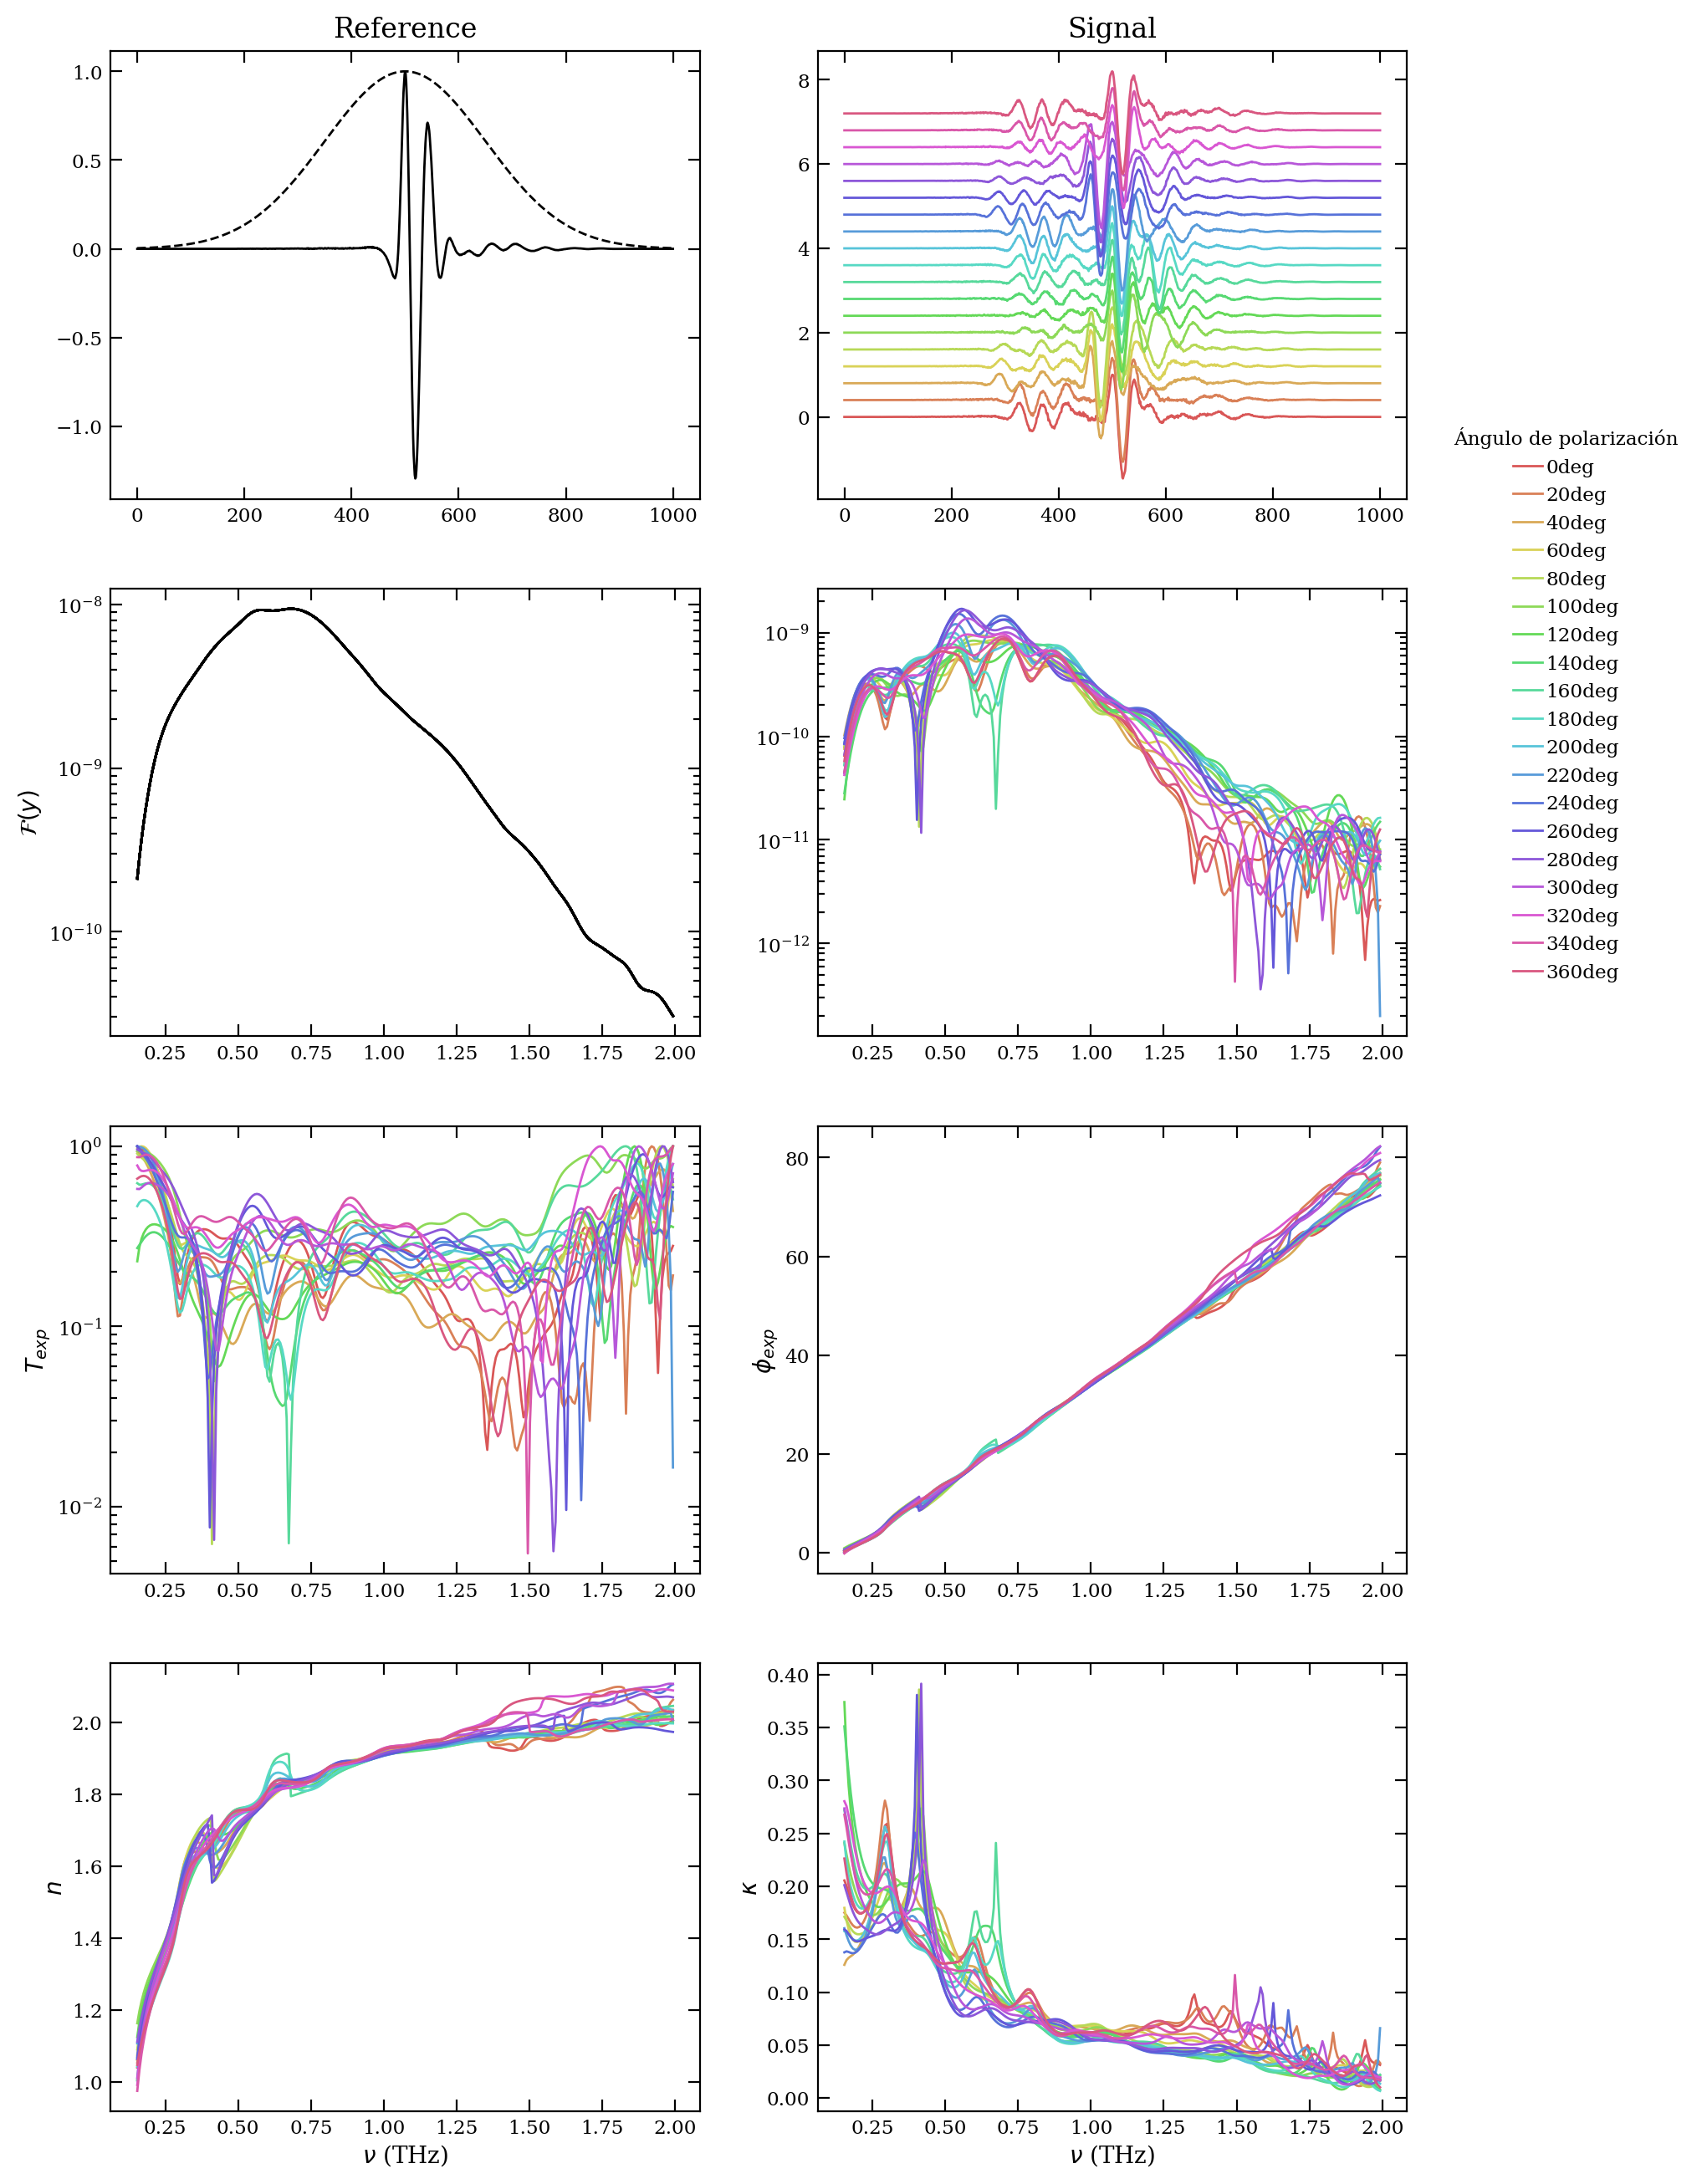

In [75]:

right_ref= 60
left = 57
N = 2**12
d = 1.78
f = plt.figure(figsize=(10,16),dpi=200)


num_files = len(sample1_med)
angles = np.linspace(0, 360, num_files, endpoint=False)  # ángulos de 0 a 350

# Usar un mapa de colores cíclico
colors = [hsv_to_rgb([angle / 360.0, 0.6, 0.85]) for angle in angles]

desv = 150
# params_window1 = ['gaussian', desv]
path_ref = rutas_ref_sample1[0]
right_sample = 63.7
left = 57
right_subs= 61.1


for j,path_signal in enumerate(sample1_med):

    params_window1 = ['gaussian', desv]
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,
                                                                                 right_sample,right_subs,params_window1)
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)


    plt.subplot(421)

    if j == 0:
        plt.plot(y_subs_ventana/max(y_subs_ventana),'k')
        plt.plot(ventana/max(ventana),'k--')
        plt.title("Reference")

    plt.subplot(422)
    plt.plot(y_signal_ventaneada/max(y_signal_ventaneada)+0.4*j, color=colors[j], label=f"{angles[j]:.0f}°")
    # plt.plot(ventana/max(ventana),'k--')
    plt.title("Signal")

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.15, 2
    mask = (nu >= xmin) & (nu <= xmax)

    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    nu_filtradas = nu[mask]

    T = fft_y_signal_ventaneada/fft_y_subs_ventaneada*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)

    

    T_exp = abs(T)
    phi_exp = np.angle(T)
    phi_exp = np.unwrap(phi_exp)

    plt.subplot(423)

    
    plt.plot(nu_filtradas,abs(fft_y_subs_ventaneada),'k',label='reference')

    plt.ylabel(r"$\mathcal{F}(y)$")
    plt.yscale('log')

    plt.subplot(424)
    plt.plot(nu_filtradas,abs(fft_y_signal_ventaneada), color=colors[j],label=angulos_sample1[j])

    # plt.plot(nu_filtradas,abs(T)/max(abs(T)))
    plt.yscale('log')


    plt.subplot(425)
    plt.plot(nu_filtradas,abs(T)/max(abs(T)), color=colors[j],label=angulos_sample1[j])
    plt.ylabel(r"$T_{exp}$")
    plt.yscale('log')
    

    plt.subplot(426)
    plt.plot(nu_filtradas,phi_exp, color=colors[j])
    plt.ylabel(r"$\phi_{exp}$")

    plt.subplot(427)
    n = calcular_n(nu_filtradas*2*np.pi, phi_exp, c, d)
    plt.plot(nu_filtradas,n, color=colors[j],label=angulos_sample1[j])
    plt.xlabel(r"$\nu$ (THz)")
    plt.ylabel(r"$n$")
    
    plt.subplot(428)
    plt.ylabel(r"$\kappa$")
    plt.xlabel(r"$\nu$ (THz)")
    plt.plot(nu_filtradas,calcular_kappa(nu_filtradas*2*np.pi, T_exp, n, c, d), color=colors[j],label=angulos_sample1[j])

plt.legend(bbox_to_anchor=(1.05, 3.8), loc='upper left', title="Ángulo de polarización")
plt.tight_layout()